In [1]:
%matplotlib widget

In [2]:
# initialization
from rayoptics.environment import *

In [3]:
root_pth = Path(rayoptics.__file__).resolve().parent

In [4]:
app = AppManager(None)
opm = app.model = OpticalModel()
sm = opm['seq_model']
osp = opm['optical_spec']
pm = opm['parax_model']
em = opm['ele_model']
pt = opm['part_tree']

In [5]:
sm.gaps[0].thi = 1e10

In [6]:
sm.list_model()

              c            t        medium     mode   zdr      sd
  Obj:     0.000000  1.00000e+10       air             1      1.0000
  Img:     0.000000      0.00000                       1      1.0000


In [7]:
osp.pupil.key, osp.pupil.value

(('aperture', 'object', 'pupil'), 1.0)

In [8]:
osp.pupil.value=22
opm.update_model()

In [9]:
opm.add_from_file(root_pth/"codev/tests/CODV_32327.seq", t=10.)

In [10]:
opm.update_model()

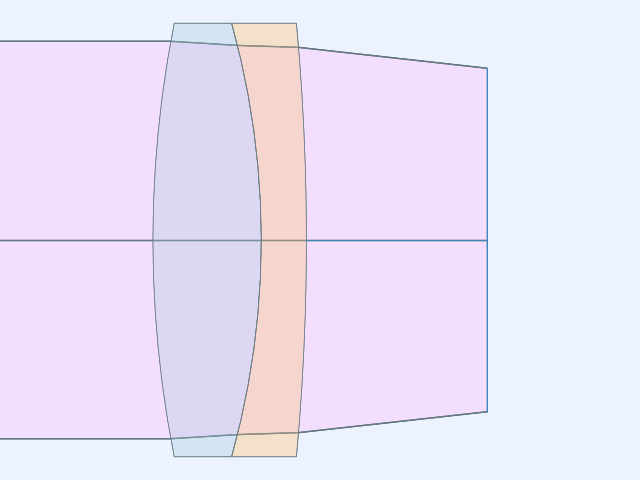

In [11]:
layout_plt0 = plt.figure(FigureClass=InteractiveLayout, opt_model=opm,
                         do_draw_rays=True, do_paraxial_layout=False).plot()

In [12]:
sm.list_model()

              c            t        medium     mode   zdr      sd
  Obj:     0.000000  1.00000e+10       air             1      0.0000
32327:     0.016268      6.00000     N-BK7             1      12.000
    2:    -0.022401      2.50000     N-SF5             1      10.772
    3:    -0.007696      10.0000       air             1      12.000
  Img:     0.000000      0.00000                       1      9.5072


In [13]:
em.list_model()

0: Object (DummyInterface): Surface(lbl='Obj', profile=Spherical(c=0.0), interact_mode='dummy')
1: CE1 (CementedElement): CementedElement: [1, 2, 3]
2: Image (DummyInterface): Surface(lbl='Img', profile=Spherical(c=0.0), interact_mode='dummy')


In [14]:
pt.list_model()

root
├── Object
├── CE1
└── Image


In [15]:
for e in em.elements:
    print(f"{e.label}: {e.tfrm[1]}")

Object: [ 0.e+00  0.e+00 -1.e+10]
Object space: [ 0.e+00  0.e+00 -1.e+10]
CE1: [0. 0. 0.]
Image space: [0.  0.  8.5]
Image: [ 0.   0.  18.5]


In [16]:
opm.add_from_file(root_pth/"codev/tests/CODV_49664.seq", t=17.8)

In [17]:
sm.list_model()

              c            t        medium     mode   zdr      sd
  Obj:     0.000000  1.00000e+10       air             1      0.0000
32327:     0.016268      6.00000     N-BK7             1      12.000
    2:    -0.022401      2.50000     N-SF5             1      10.772
    3:    -0.007696      10.0000       air             1      12.000
49663:     0.042553      9.00000   S-LAL 8             1      9.2950
    5:    -0.027248      2.50000   S-TIH53             1      7.7977
    6:     0.000000    0.0800000   517.520             1      7.1187
    7:    -0.003096      17.8000       air             1      7.1101
  Img:     0.000000      0.00000                       1   0.0067822


In [18]:
listobj(sm.ifcs[7].profile)

profile: EvenPolynomial
c=-0.003095913950326,   r=-323.006393602994   conic cnst=0.0
coefficients: [0.0, 1.38925111836e-05, -2.08175206307e-08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]



In [19]:
osp.field_of_view.key, osp.field_of_view.max_field()

(('field', 'object', 'angle'), (0.0, 0))

In [20]:
opm.update_model()

In [21]:
pm.first_order_data()

efl               28.88
ffl              -16.06
pp1               12.82
bfl               17.98
ppk                10.9
f/#               1.313
m            -2.888e-09
red          -3.462e+08
obj_dist          1e+10
obj_ang               1
enp_dist             -0
enp_radius           11
na obj          1.1e-09
n obj                 1
img_dist          17.98
img_ht           0.5041
exp_dist         -33.79
exp_radius        19.78
na img          -0.3559
n img                 1
optical invariant        0.192


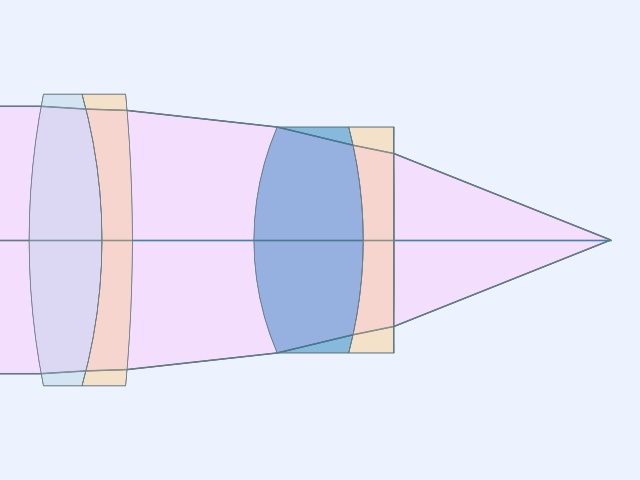

In [22]:
layout_plt1 = plt.figure(FigureClass=InteractiveLayout, opt_model=opm,
                         do_draw_rays=True, do_paraxial_layout=False).plot()

In [23]:
em.list_elements()

0: Object (DummyInterface): Surface(lbl='Obj', profile=Spherical(c=0.0), interact_mode='dummy')
1: Object space (AirGap): Gap(t=10000000000.0, medium=Air())
2: CE1 (CementedElement): CementedElement: [1, 2, 3]
3: AG3 (AirGap): Gap(t=10.0, medium=Air())
4: CE2 (CementedElement): CementedElement: [4, 5, 6, 7]
5: Image space (AirGap): Gap(t=17.8, medium=Air())
6: Image (DummyInterface): Surface(lbl='Img', profile=Spherical(c=0.0), interact_mode='dummy')


In [24]:
pt.list_tree()

root
├── Object
│   └── p
│       └── i0
├── Object space
│   └── t
│       └── g0
├── CE1
│   ├── p1
│   │   └── i1
│   ├── t1
│   │   └── g1
│   ├── p2
│   │   └── i2
│   ├── t2
│   │   └── g2
│   └── p3
│       └── i3
├── AG3
│   └── t
│       └── g3
├── CE2
│   ├── p1
│   │   └── i4
│   ├── t1
│   │   └── g4
│   ├── p2
│   │   └── i5
│   ├── t2
│   │   └── g5
│   ├── p3
│   │   └── i6
│   ├── t3
│   │   └── g6
│   └── p4
│       └── i7
├── Image space
│   └── t
│       └── g7
└── Image
    └── p
        └── i8
